# Iris Classufication Using Python

## About Data

### Overview
The Iris dataset is a well-known dataset in the field of machine learning and statistics. It contains 150 observations of iris flowers, with each observation consisting of four features and a target label. The dataset was introduced by the British biologist and statistician Ronald A. Fisher in 1936.

### Features
The dataset contains the following features (all measured in centimeters):

1. **Sepal Length**: The length of the sepal.
2. **Sepal Width**: The width of the sepal.
3. **Petal Length**: The length of the petal.
4. **Petal Width**: The width of the petal.

### Target Labels
The target label in the dataset represents the species of the iris flower. There are three species as follows: 

- setosa
- versicolor
- virginica

## References
- Fisher, R.A. (1936). "The Use of Multiple Measurements in Taxonomic Problems". Annals of Eugenics. 7 (2): 179–188.
- UCI Machine Learning Repository: [Iris Data Set](https://archive.ics.uci.edu/ml/datasets/iris)




In [49]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.pipeline import Pipeline 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

In [3]:
# load the data
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.shape

(150, 5)

In [7]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [11]:
# check for missing values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [14]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [13]:
# check for duplicates in the data
df.duplicated().sum()

1

In [17]:
# drop duplicate
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [18]:
# Descriptive Summary
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualizations

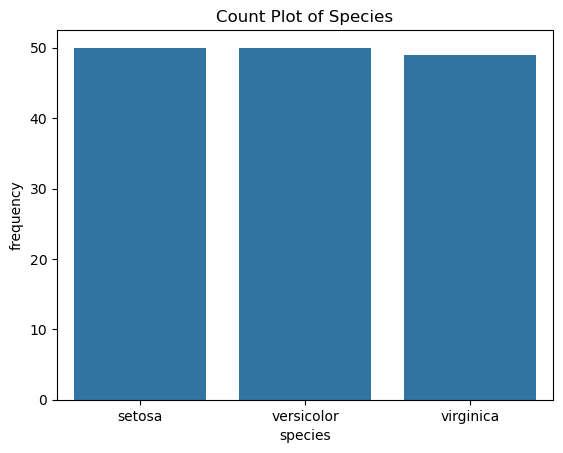

In [21]:
# count plot of species
sns.countplot(df, x='species')
plt.title('Count Plot of Species')
plt.xlabel('species')
plt.ylabel('frequency')
plt.show()

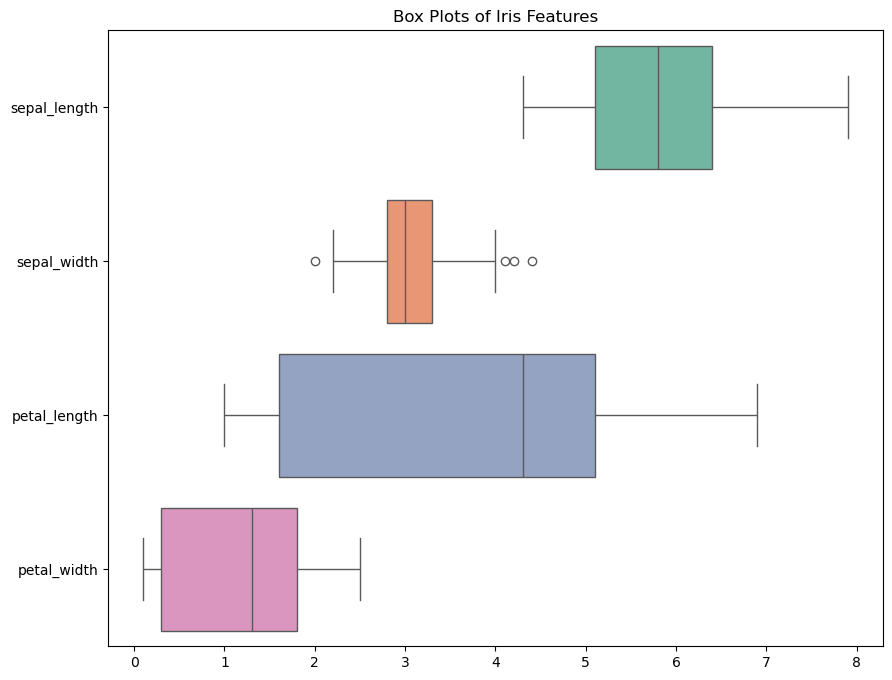

In [25]:
# box plots for each numerical feature
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, orient='h', palette='Set2')
plt.title('Box Plots of Iris Features')
plt.show()

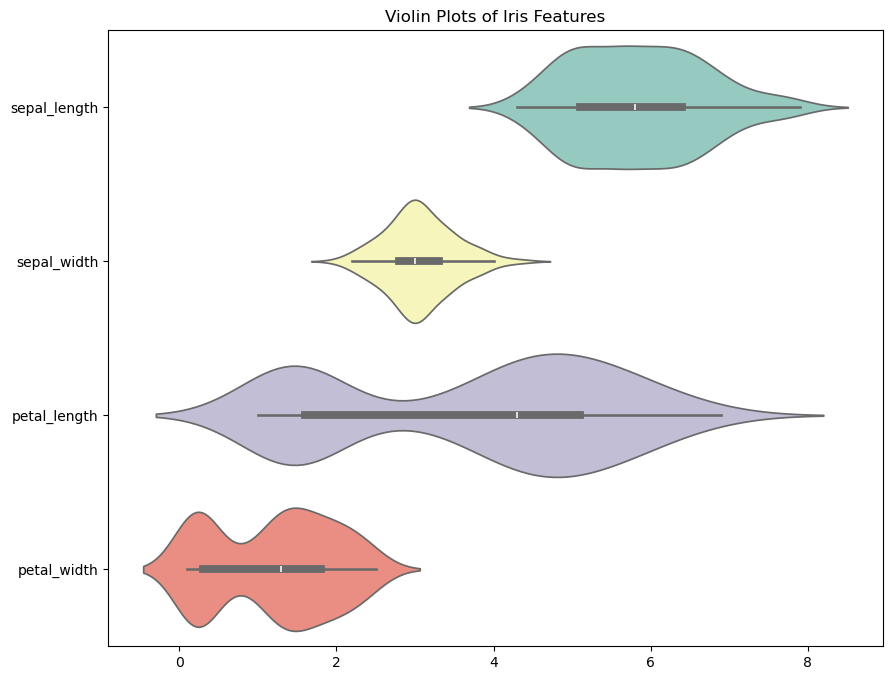

In [27]:
# Create violin plots for each numerical feature
plt.figure(figsize=(10, 8))
sns.violinplot(data=df, orient='h', palette='Set3')
plt.title('Violin Plots of Iris Features')
plt.show()

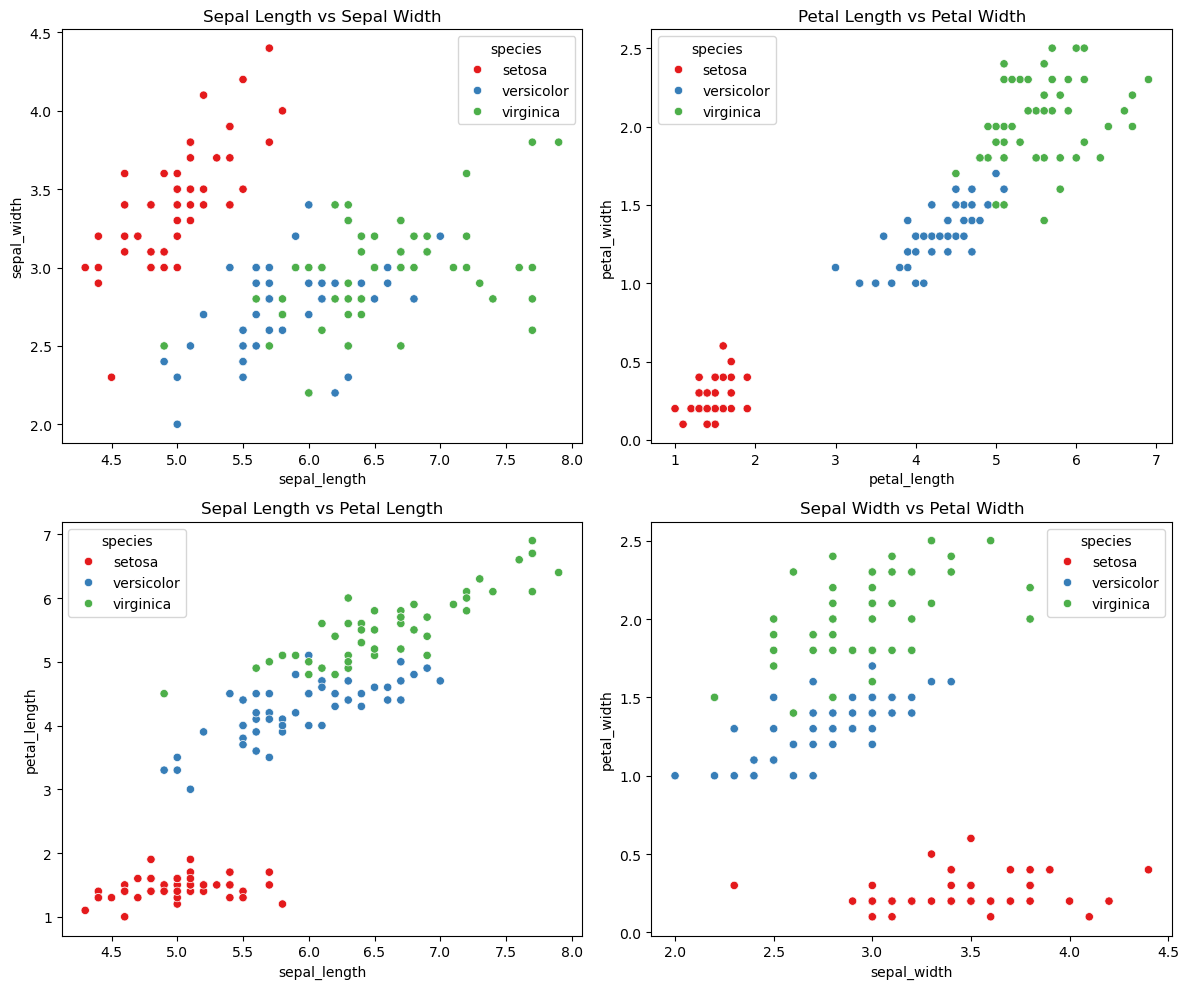

In [28]:
# Create scatter plots for selected pairs of features
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species', palette='Set1')
plt.title('Sepal Length vs Sepal Width')

plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species', palette='Set1')
plt.title('Petal Length vs Petal Width')

plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='sepal_length', y='petal_length', hue='species', palette='Set1')
plt.title('Sepal Length vs Petal Length')

plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='sepal_width', y='petal_width', hue='species', palette='Set1')
plt.title('Sepal Width vs Petal Width')

plt.tight_layout()
plt.show()

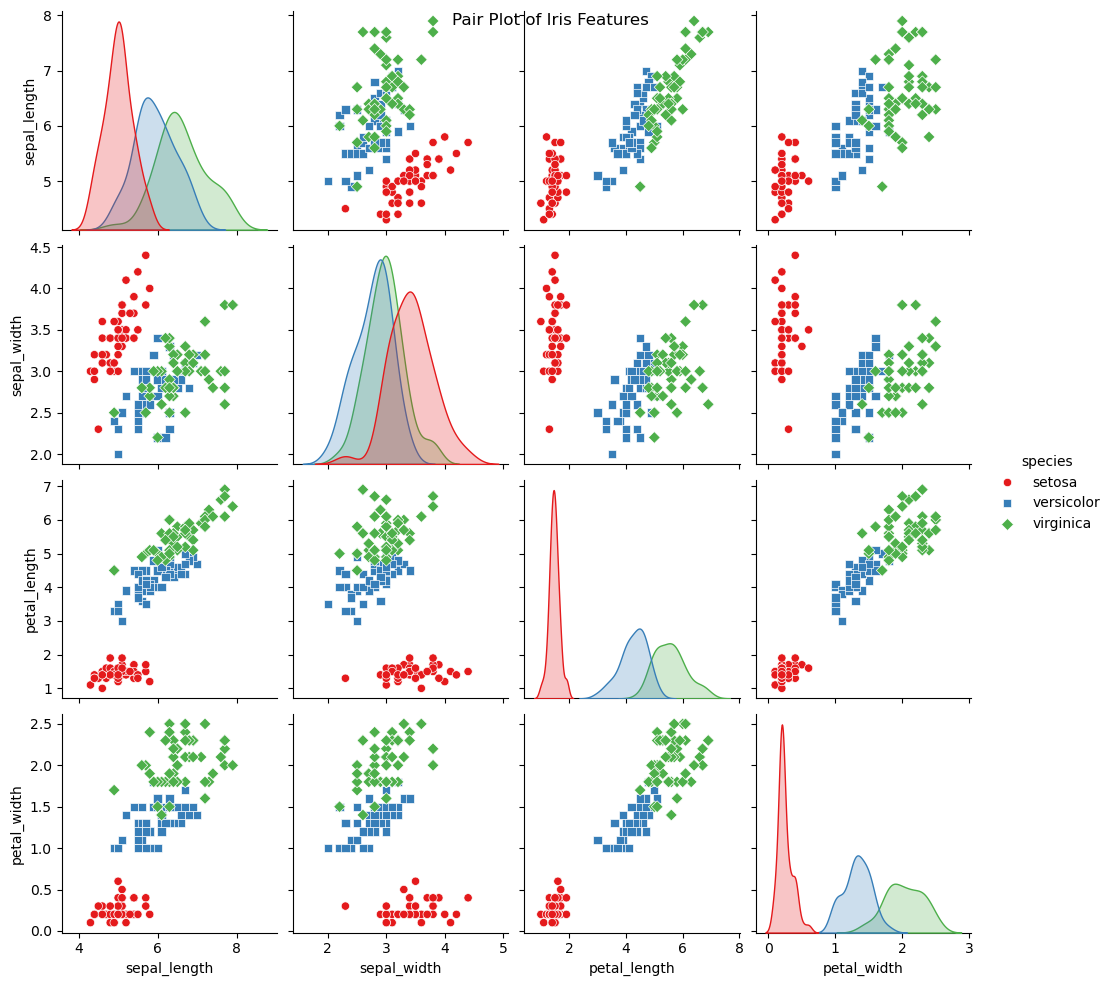

In [32]:
# Pair plots provide a grid of scatter plots for each pair of numerical features along with histograms for individual features.
sns.pairplot(df, hue='species', palette='Set1', markers=["o", "s", "D"])
plt.suptitle('Pair Plot of Iris Features')
plt.show()

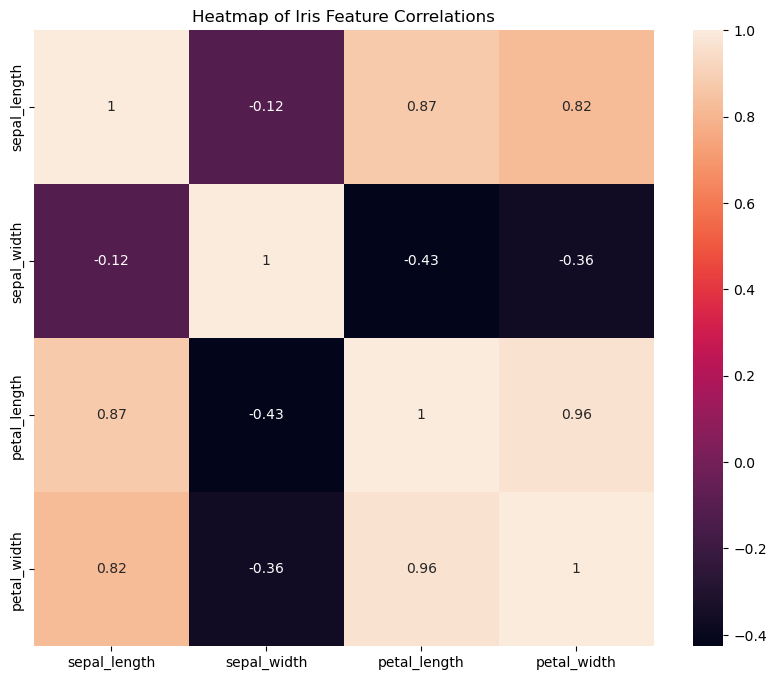

In [39]:
# heatmap for correlation matrix
numerical_features = df.drop(columns='species')
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)

# Add title
plt.title('Heatmap of Iris Feature Correlations')
plt.show()

In [51]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [52]:
# Encode the data
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [56]:
# extract independent and dependent variables 
X = df.drop(columns='species')
y = df['species']

# train test split
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [57]:
# print the shapes 
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (119, 4)
X_test:  (30, 4)
y_train:  (119,)
y_test:  (30,)


## Model Selection

Models that we will use:

- Logistic Regression
- SVM
- Decision Tree
- Random Forest
- AdaBoost
- Gradient Boosting
- Naive Bayes

In [64]:
models = [
    ('LogisticRegression', LogisticRegression()),
    ('SVC', SVC()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('RandomForestClassifier', RandomForestClassifier()),
    ('AdaBoostClassifier', AdaBoostClassifier()),
    ('GradientBoostingClassifier', GradientBoostingClassifier()),
    ('MultinomialNB', MultinomialNB()),
    ('BernoulliNB', BernoulliNB())
]

best_model = None
best_accuracy = 0
# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('model', model)
    ])
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy:", accuracy)
    print()
    
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline



# save the best model
import pickle
pickle.dump(best_model, open('iris_classification.pkl', 'wb'))
print("-----------------------------------------------------------")
print(f"Best model: {best_model} with accuracy score: {best_accuracy}")

Model: LogisticRegression
Test Accuracy: 1.0

Model: SVC
Test Accuracy: 1.0

Model: DecisionTreeClassifier
Test Accuracy: 0.9666666666666667

Model: RandomForestClassifier
Test Accuracy: 1.0

Model: AdaBoostClassifier
Test Accuracy: 0.9666666666666667

Model: GradientBoostingClassifier
Test Accuracy: 0.9666666666666667

Model: MultinomialNB
Test Accuracy: 0.9

Model: BernoulliNB
Test Accuracy: 0.23333333333333334

-----------------------------------------------------------
Best model: Pipeline(steps=[('model', LogisticRegression())]) with accuracy score: 1.0


## Conclusion
After evaluating multiple classification models on the Iris dataset, the test accuracy scores for each model are as follows:

- **Logistic Regression**: 1.0
- **Support Vector Classifier (SVC)**: 1.0
- **Decision Tree Classifier**: 0.967
- **Random Forest Classifier**: 1.0
- **AdaBoost Classifier**: 0.967
- **Gradient Boosting Classifier**: 0.967
- **Multinomial Naive Bayes**: 0.9
- **Bernoulli Naive Bayes**: 0.233

Among these models, **Logistic Regression**, **Support Vector Classifier (SVC)**, and **Random Forest Classifier** achieved the highest test accuracy of 1.0. This indicates perfect classification performance on the test set, which is an excellent result, showing that these models can accurately distinguish between the different species of iris flowers in this dataset.

**Decision Tree Classifier**, **AdaBoost Classifier**, and **Gradient Boosting Classifier** also performed very well with a test accuracy of approximately 0.967. **Multinomial Naive Bayes** performed reasonably well with an accuracy of 0.9, while **Bernoulli Naive Bayes** had the lowest accuracy of 0.233, indicating it is not suitable for this classification problem.

Considering these results, the best-performing models are **Logistic Regression**, **SVC**, and **Random Forest Classifier**. Among these, the `**Logistic Regression**`model is identified as the best due to its simplicity and high accuracy, making it an excellent choice for this classification task on the Iris dataset.